In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\E\E_drive_copy\sample_data\model_validation\social_ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
x = df.iloc[:, 2:4].values
y = df.iloc[:, 4].values

In [5]:
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [7]:
from sklearn.svm import SVC

In [8]:
svc = SVC()

In [9]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size=0.3, random_state=1)

In [10]:
svc.fit(x_tr, y_tr)

SVC()

In [11]:
y_p = svc.predict(x_te)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_te, y_p)

0.675

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
acc = cross_val_score(estimator=svc, X=x_tr, y=y_tr, cv=10)

In [15]:
acc

array([0.75      , 0.82142857, 0.82142857, 0.89285714, 0.82142857,
       0.78571429, 0.85714286, 0.78571429, 0.82142857, 0.78571429])

In [16]:
acc.mean()

0.8142857142857143

In [17]:
acc.std()

0.038465462908103605

In [18]:
from sklearn.model_selection import GridSearchCV

param = [{'C':[1,2,], 'kernel':['rbf', 'linear']}]

In [ ]:
grid = GridSearchCV(estimator=svc, param_grid=param, scoring='accuracy', n_jobs=-1)
grid.fit(x_tr, y_tr)

In [ ]:
grid.best

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\E\E_drive_copy\sample_data\ts\air_passengers.csv')

In [3]:
df

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [5]:
# converting month to datetime format

df['Month'] = pd.to_datetime(df['Month'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
#making month column as index

df.set_index('Month', inplace=True)

In [8]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

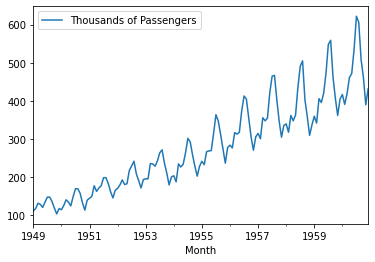

In [9]:
df.plot()

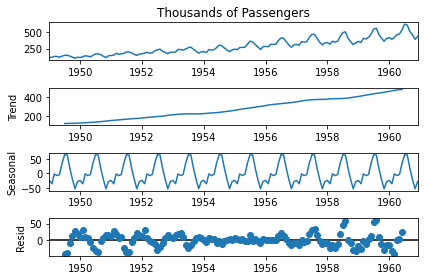

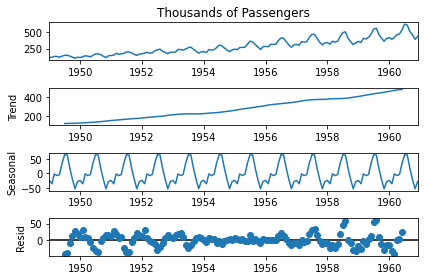

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Thousands of Passengers'])
decomposition.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Thousands of Passengers'])

(0.815368879206053,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [12]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey Fuller Test Result')
    print('-----------------------------------')
    labels = ['ADF Test Statistic', 'P-Value', '#Lags', 'No of observations']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print('Time series is stationary')
    else:
        print('Time series is not stationary')

In [13]:
adf_check(df['Thousands of Passengers'])

Augmented Dickey Fuller Test Result
-----------------------------------
ADF Test Statistic : 0.815368879206053
P-Value : 0.9918802434376411
#Lags : 13
No of observations : 130
Time series is not stationary


In [14]:
df['Thousands of Passengers 1st diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [15]:
df

,Thousands of Passengers,Thousands of Passengers 1st diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


In [16]:
adf_check(df['Thousands of Passengers 1st diff'].dropna())

Augmented Dickey Fuller Test Result
-----------------------------------
ADF Test Statistic : -2.829266824169997
P-Value : 0.05421329028382577
#Lags : 12
No of observations : 130
Time series is not stationary


In [17]:
d = 2

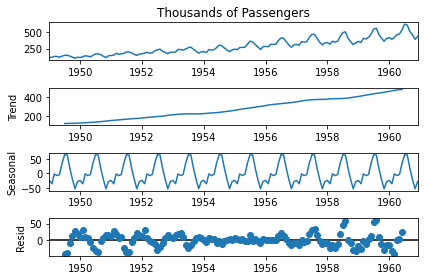

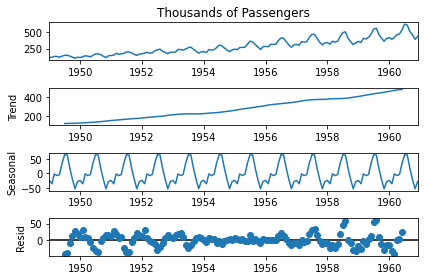

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Thousands of Passengers'])
decomposition.plot()

In [20]:
df['Thousands of Passengers 1st diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [21]:
df['Thousands of Passengers 2nd diff'] = df['Thousands of Passengers 1st diff'] - df['Thousands of Passengers 1st diff'].shift(1)

In [22]:
adf_check(df['Thousands of Passengers 2nd diff'].dropna())

Augmented Dickey Fuller Test Result
-----------------------------------
ADF Test Statistic : -16.384231542468477
P-Value : 2.732891850014397e-29
#Lags : 11
No of observations : 130
Time series is stationary


C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


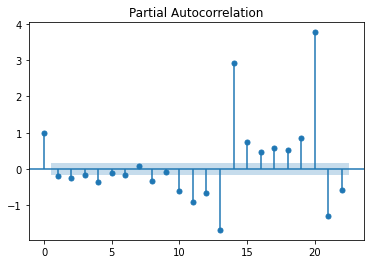

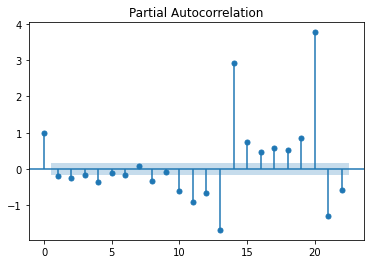

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df['Thousands of Passengers 2nd diff'].dropna())

In [24]:
AR              I              MA
p=0            d=2             q
P               D              Q

SyntaxError: invalid syntax (<ipython-input-24-db1f68f138d2>, line 1)

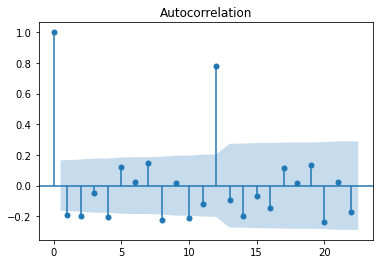

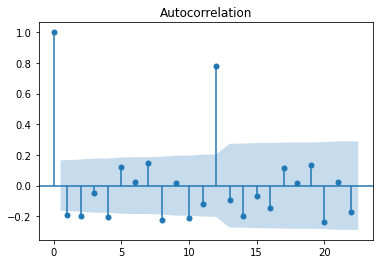

In [25]:
plot_acf(df['Thousands of Passengers 2nd diff'].dropna())

In [ ]:
AR              I              MA
p=0            d=2            q=0    #related to trend
P               D              Q     # related to seasonality

In [26]:
df['seasonal_difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [27]:
adf_check(df['seasonal_difference'].dropna())


# P-value is less than 0.05, so D=1

Augmented Dickey Fuller Test Result
-----------------------------------
ADF Test Statistic : -3.3830207264924805
P-Value : 0.011551493085514982
#Lags : 1
No of observations : 130
Time series is stationary


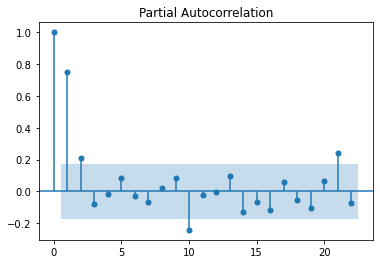

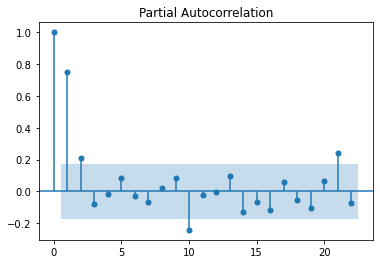

In [28]:
plot_pacf(df['seasonal_difference'].dropna())

# P is 1

In [ ]:
AR              I              MA
p=0            d=2            q=0    #related to trend
P=1            D=1              Q     # related to seasonality

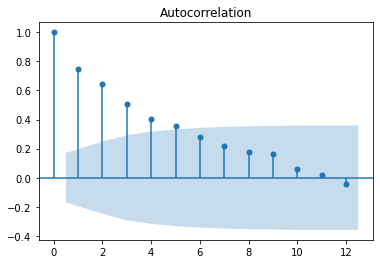

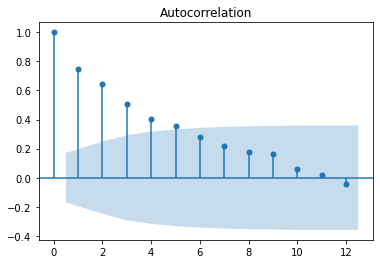

In [29]:
plot_acf(df['seasonal_difference'].dropna(), lags=12)

In [ ]:
#3 previous months are important, Q=3

AR              I              MA
p=0            d=2            q=0     # related to trend
P=1            D=1            Q=3     # related to seasonality

In [30]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [31]:
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'], order=(0,2,0), seasonal_order=(1,1,3,12))

C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [32]:
results = model.fit()


C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [33]:
print(results.summary())


                                         SARIMAX Results                                          
Dep. Variable:                    Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(0, 2, 0)x(1, 1, [1, 2, 3], 12)   Log Likelihood                -570.082
Date:                                    Sat, 26 Feb 2022   AIC                           1150.163
Time:                                            16:14:01   BIC                           1164.501
Sample:                                        01-01-1949   HQIC                          1155.989
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0409      0.997     -0.041      0

In [34]:
df['forcast'] = results.predict(start=130, end=144, dynamic=True)

In [35]:
df

,Thousands of Passengers,Thousands of Passengers 1st diff,Thousands of Passengers 2nd diff,seasonal_difference,forcast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0,479.540425
1960-09-01,508,-98.0,-82.0,45.0,376.259467
1960-10-01,461,-47.0,51.0,54.0,314.152911


In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Month'>

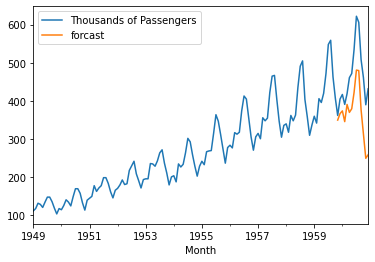

In [37]:
df[['Thousands of Passengers', 'forcast']].plot()

# prediction is not accurate

In [38]:
# trying with order (1,2,1) instead of (0,2,0)

model2 = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'], order=(1,2,1), seasonal_order=(1,2,3,12))
results2 = model2.fit()
print(results2.summary())

C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1008: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\sreer\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                         SARIMAX Results                                          
Dep. Variable:                    Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 2, [1, 2, 3], 12)   Log Likelihood                -466.893
Date:                                    Sat, 26 Feb 2022   AIC                            947.786
Time:                                            16:18:11   BIC                            967.181
Sample:                                        01-01-1949   HQIC                           955.661
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4147      0.083     -4.994      0

In [39]:
df['forcast3'] = results2.predict(start=130, end=144, dynamic=True)

<AxesSubplot:xlabel='Month'>

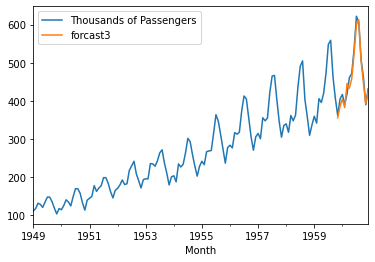

In [40]:
df[['Thousands of Passengers', 'forcast3']].plot()

#predictiona are much better